## CART

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 와인 데이터
# 데이터 불러오기. y값은 이미 범주형으로 되어있음.
# y class (1,2,3) 3개, 특성변수 x 13개
dat_wine=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                     'wine/wine.data',header=None)
print(dat_wine.head())
dat_wine.columns = ['class label', 'alchohol', 'malic acid', 'ash', 
                    'alcalinity of ash', 'magnesium', 'total phenols', 
                    'flavanoids', 'nonflavanoid phenols', 
                    'proanthocyanins', 'color intensity', 'hue', 
                    'OD208', 'proline']  # Column names
print('class label:', np.unique(dat_wine['class label']))  # Class 출력
dat_wine.head()

   0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  
class label: [1 2 3]


,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
print(dat_wine.shape)

(178, 14)


In [35]:
# 전체 data를 training set과 test set으로 split
from sklearn.model_selection import train_test_split
X, y = dat_wine.iloc[:,1:].values, dat_wine.iloc[:,0].values
X_train, X_test, y_train,y_test = \
    train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

## gini

In [36]:
# 3
from sklearn import tree  # 또는 from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
result=dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  # Training accuracy
y_test_pred = dtc.predict(X_test)    # Test accuracy

[Text(125.55000000000001, 190.26, 'color intensity <= 3.46\ngini = 0.657\nsamples = 124\nvalue = [41, 50, 33]\nclass = 2'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]\nclass = 2'),
 Text(167.4, 135.9, 'flavanoids <= 1.58\ngini = 0.593\nsamples = 84\nvalue = [41, 10, 33]\nclass = 1'),
 Text(83.7, 81.53999999999999, 'hue <= 0.97\ngini = 0.108\nsamples = 35\nvalue = [0, 2, 33]\nclass = 3'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = 3'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = 2'),
 Text(251.10000000000002, 81.53999999999999, 'proline <= 706.5\ngini = 0.273\nsamples = 49\nvalue = [41, 8, 0]\nclass = 1'),
 Text(209.25, 27.180000000000007, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]\nclass = 2'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = 1')]

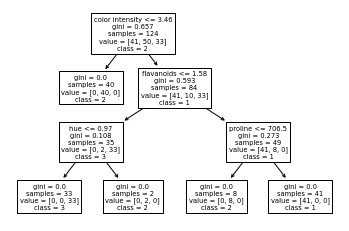

In [37]:
#tree.plot_tree(dtc.fit(X_train,y_train))
tree.plot_tree(result, class_names=['1', '2', '3'],feature_names=['alchohol', 'malic acid', 'ash', 
                    'alcalinity of ash', 'magnesium', 'total phenols', 
                    'flavanoids', 'nonflavanoid phenols', 
                    'proanthocyanins', 'color intensity', 'hue', 
                    'OD208', 'proline'])

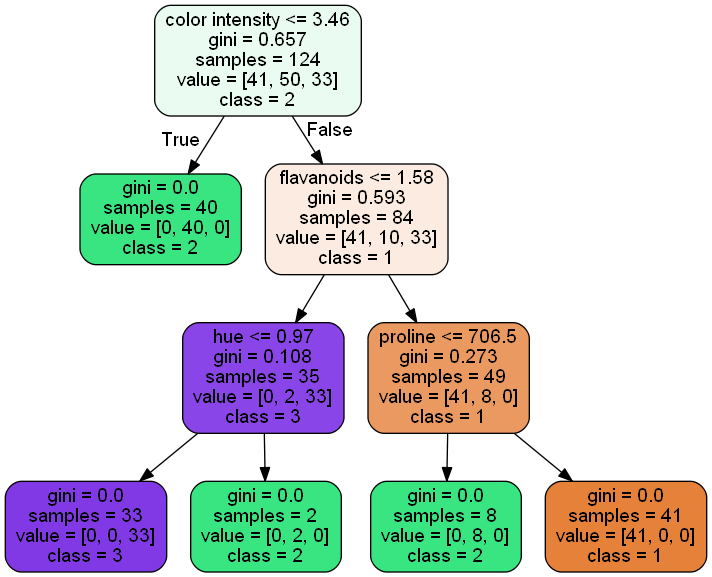

In [39]:
# Graphic
from pydotplus import graph_from_dot_data  # "pydotplus"는 따로 설치해야 함.
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc, filled=True, rounded=True,
                           class_names=['1', '2', '3'], 
                           feature_names=['alchohol', 'malic acid', 'ash', 
                    'alcalinity of ash', 'magnesium', 'total phenols', 
                    'flavanoids', 'nonflavanoid phenols', 
                    'proanthocyanins', 'color intensity', 'hue', 
                    'OD208', 'proline'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
# graph.write_png('tree.png')  # 현재경로(import os 엔터 os.getcwd()로 확인)에 저 장


from IPython.display import Image 
Image(graph.create_png())   # Console 창에 결과 그림 출력

In [7]:
# Accuracy score
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

1.0
0.9629629629629629


In [8]:
# 2
from sklearn import tree  # 또는 from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
result=dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  # Training accuracy
y_test_pred = dtc.predict(X_test)    # Test accuracy

In [9]:
# Accuracy score
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9193548387096774
0.8888888888888888


In [14]:
# 6
from sklearn import tree  # 또는 from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1)
result=dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  # Training accuracy
y_test_pred = dtc.predict(X_test)    # Test accuracy

In [15]:
# Accuracy score
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

1.0
0.9629629629629629


## entropy

In [16]:
# 2
from sklearn import tree  # 또는 from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
result=dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  # Training accuracy
y_test_pred = dtc.predict(X_test)    # Test accuracy

In [17]:
# Accuracy score
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9354838709677419
0.8333333333333334


In [18]:
# 3
from sklearn import tree  # 또는 from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)
result=dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  # Training accuracy
y_test_pred = dtc.predict(X_test)    # Test accuracy

In [19]:
# Accuracy score
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9919354838709677
0.9074074074074074


In [24]:
# 5
from sklearn import tree  # 또는 from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
result=dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  # Training accuracy
y_test_pred = dtc.predict(X_test)    # Test accuracy

In [25]:
# Accuracy score
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

1.0
0.9074074074074074


## 표준화

In [26]:
# 표준화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [33]:
# 3
from sklearn import tree  # 또는 from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
result=dtc.fit(X_train_std, y_train)
y_train_pred = dtc.predict(X_train_std)  # Training accuracy
y_test_pred = dtc.predict(X_test_std)    # Test accuracy

In [34]:
# Accuracy score
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

1.0
0.9629629629629629
